In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import random 

pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)

In [2]:
df = pd.read_csv('country_vaccinations.csv')

In [5]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [6]:
df_prcc = df.drop(['vaccines','source_name','source_website'],axis=1) # Drop rowwise 

In [7]:
df_prcc.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


In [8]:
df_prcc['date']=pd.to_datetime(df.date)

In [9]:
df.total_vaccinations.tail(2)

17605    709772.0
17606    730365.0
Name: total_vaccinations, dtype: float64

In [10]:
df.total_vaccinations.value_counts()

0.0            124
6.0             22
8649.0           8
11.0             7
10702.0          7
3000.0           5
2601.0           5
846.0            5
841.0            5
2.0              5
700.0            4
4366.0           4
6504.0           4
3128.0           4
3779.0           4
1815.0           4
9741.0           4
10000.0          4
13329.0          3
1174.0           3
578.0            3
12998.0          3
100000.0         3
14369.0          3
7414.0           3
45398.0          3
4000.0           3
42455.0          3
15000.0          3
67409.0          3
343.0            3
65332.0          3
800000.0         3
11457.0          3
8860.0           3
7000.0           3
5490.0           3
2000.0           3
2500.0           3
5.0              3
1.0              3
30000.0          3
336660.0         2
16000.0          2
480237.0         2
22040.0          2
17078.0          2
160000.0         2
2222.0           2
101573.0         2
2094.0           2
64048.0          2
43073.0     

In [11]:
df.groupby('country').first()

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
country,,,,,,,,,,,,,,
Afghanistan,AFG,2021-02-22,0.0,0.0,55624.0,NaN,1367.0,0.00,0.00,0.14,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
Albania,ALB,2021-01-10,0.0,0.0,1.0,60.0,64.0,0.00,0.00,0.00,22.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
Algeria,DZA,2021-01-29,0.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.echoroukonline.com/%d9%84%d9%82%d8...
Andorra,AND,2021-01-25,576.0,576.0,1172.0,2829.0,66.0,0.75,0.75,1.52,854.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Andorra,https://www.govern.ad/covid19_newsletter/
Angola,AGO,2021-03-01,0.0,0.0,40195.0,NaN,881.0,0.00,0.00,0.12,27.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/
Anguilla,AIA,2021-02-04,0.0,0.0,783.0,1421.0,149.0,0.00,0.00,5.22,9932.0,Oxford/AstraZeneca,Ministry of Health,https://www.travelpulse.com/news/impacting-tra...
Antigua and Barbuda,ATG,2021-02-16,0.0,0.0,NaN,225.0,895.0,0.00,0.00,NaN,9139.0,Oxford/AstraZeneca,Ministry of Health,https://www.facebook.com/investingforwellness/...
Argentina,ARG,2020-12-29,700.0,243539.0,4394.0,17791.0,15656.0,0.00,0.54,0.01,346.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
Armenia,ARM,2021-03-31,565.0,565.0,NaN,NaN,248.0,0.02,0.02,NaN,84.0,Sputnik V,Ministry of Health,https://arminfo.info/full_news.php?id=62520&la...


In [12]:
train_data = df.copy()

In [13]:
train_data = train_data.drop(['iso_code','date','daily_vaccinations_raw','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                 'people_fully_vaccinated_per_hundred','daily_vaccinations_per_million','vaccines','source_website'],axis=1)

In [14]:
cntry_vs_ttl_vcc = train_data[['country','total_vaccinations']]

In [15]:
cntry_vs_ttl_vcc = pd.DataFrame(cntry_vs_ttl_vcc.groupby('country').sum()) 
cntry_vs_ttl_vcc.head()

,total_vaccinations
country,
Afghanistan,926702.0
Albania,15518217.0
Algeria,75030.0
Andorra,217053.0
Angola,2178329.0


In [16]:
cntry_vs_ttl_vcc.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'United States', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'Wales', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=211)

In [17]:
cntry_vs_ppl_vcc = train_data.groupby(['country','total_vaccinations']).first()

In [18]:
cntry_vs_ppl_vcc = cntry_vs_ppl_vcc.groupby(['country']).sum()
cntry_vs_ppl_vcc.head()

,people_vaccinated,people_fully_vaccinated,daily_vaccinations
country,,,
Afghanistan,871078.0,55624.0,29150.0
Albania,459256.0,190237.0,524622.0
Algeria,0.0,0.0,3778.0
Andorra,128692.0,26948.0,5598.0
Angola,2138134.0,40195.0,81004.0


In [19]:
#Employee = [['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
#       ['CSE', 'CSE', 'EEE', 'EEE', 'CE', 'CE', 'ME', 'ME'],
#       ['Cat-1', 'Cat-2', 'Cat-1', 'Cat-2', 'Cat-1', 'Cat-2', 'Cat-1', 'Cat-2']]

#index = pd.MultiIndex.from_arrays(Employee, names=['Name', 'Dept', 'Category'])

#Scale = [1, 2, 2, 3, 3, 1, 2, 3]
#Salary = [100, 200, 200, 300, 300, 100, 200, 300]

#df = pd.DataFrame({'scale': Scale,
#              'salary': Salary},
#             index=index)

In [20]:
#df

In [21]:
#df.groupby(['Category', 'scale']).sum()

In [22]:
cntry_vs_ttl_vcc= pd.DataFrame(cntry_vs_ttl_vcc.total_vaccinations.sort_values(ascending=False),columns=['total_vaccinations'])

In [23]:
cntry_vs_ttl_vcc = cntry_vs_ttl_vcc[cntry_vs_ttl_vcc.total_vaccinations >= 48927242.0 ]

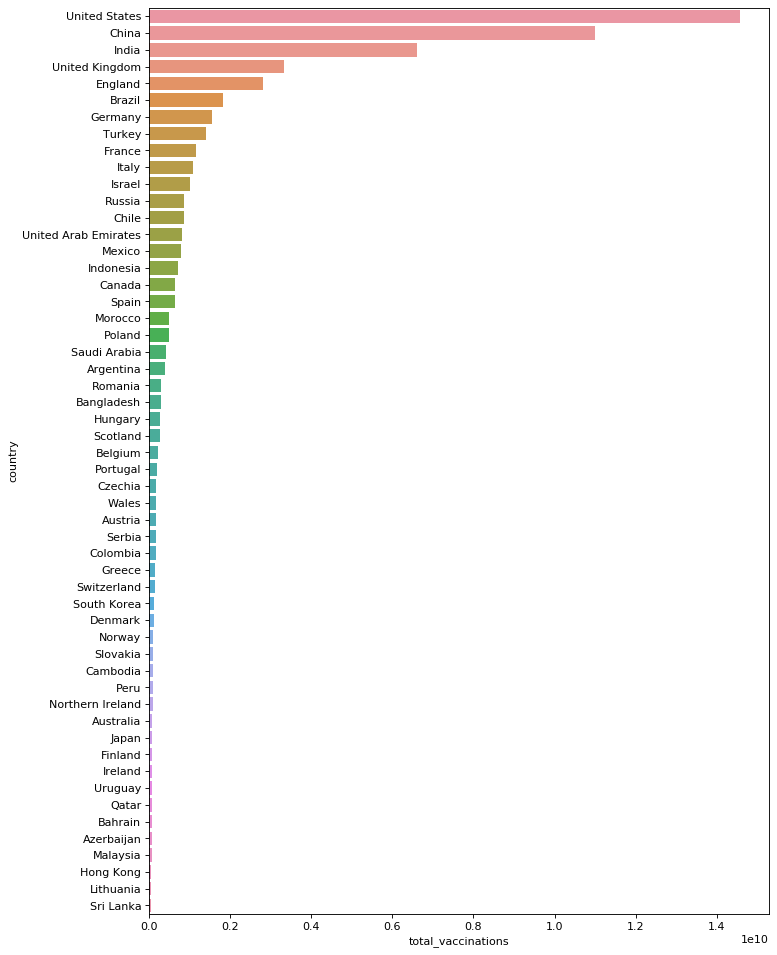

In [24]:
plt.figure(figsize=(10,15), dpi= 80)
sns.barplot(cntry_vs_ttl_vcc.total_vaccinations,cntry_vs_ttl_vcc.index)

In [25]:
cntry_vs_ttl_vcc[cntry_vs_ttl_vcc.index == 'Saudi Arabia']

,total_vaccinations
country,
Saudi Arabia,421975314.0


In [26]:
cntry_vs_ttl_vcc_1 = cntry_vs_ttl_vcc[cntry_vs_ttl_vcc.total_vaccinations >= 421975314.0]
cntry_vs_ttl_vcc_2 = cntry_vs_ttl_vcc[cntry_vs_ttl_vcc.total_vaccinations < 421975314.0]

Text(0, 0.5, 'Country')

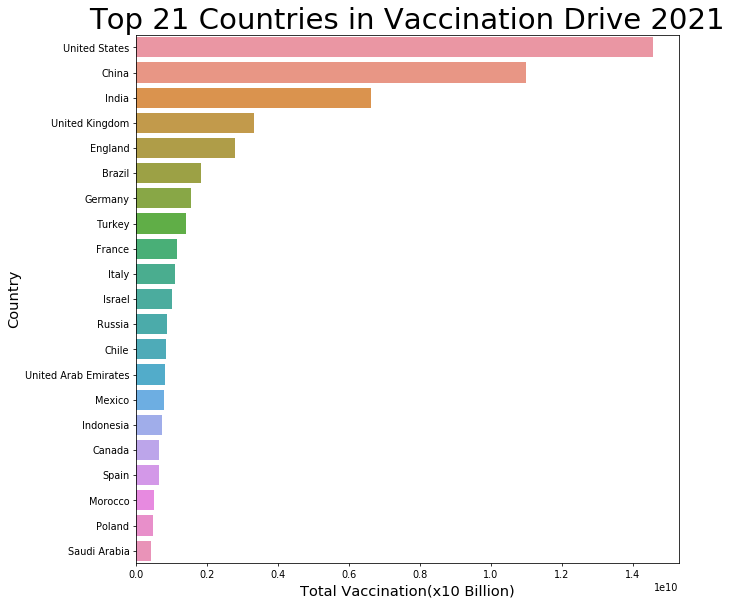

In [27]:
plt.figure(figsize=(10,10), dpi= 70)
plot = sns.barplot(cntry_vs_ttl_vcc_1.total_vaccinations,cntry_vs_ttl_vcc_1.index)

plot.axes.set_title("Top 21 Countries in Vaccination Drive 2021",fontsize=30)
plot.set_xlabel('Total Vaccination(x10 Billion)',fontsize=15)
plot.set_ylabel('Country',fontsize=15)

Text(0, 0.5, 'Country')

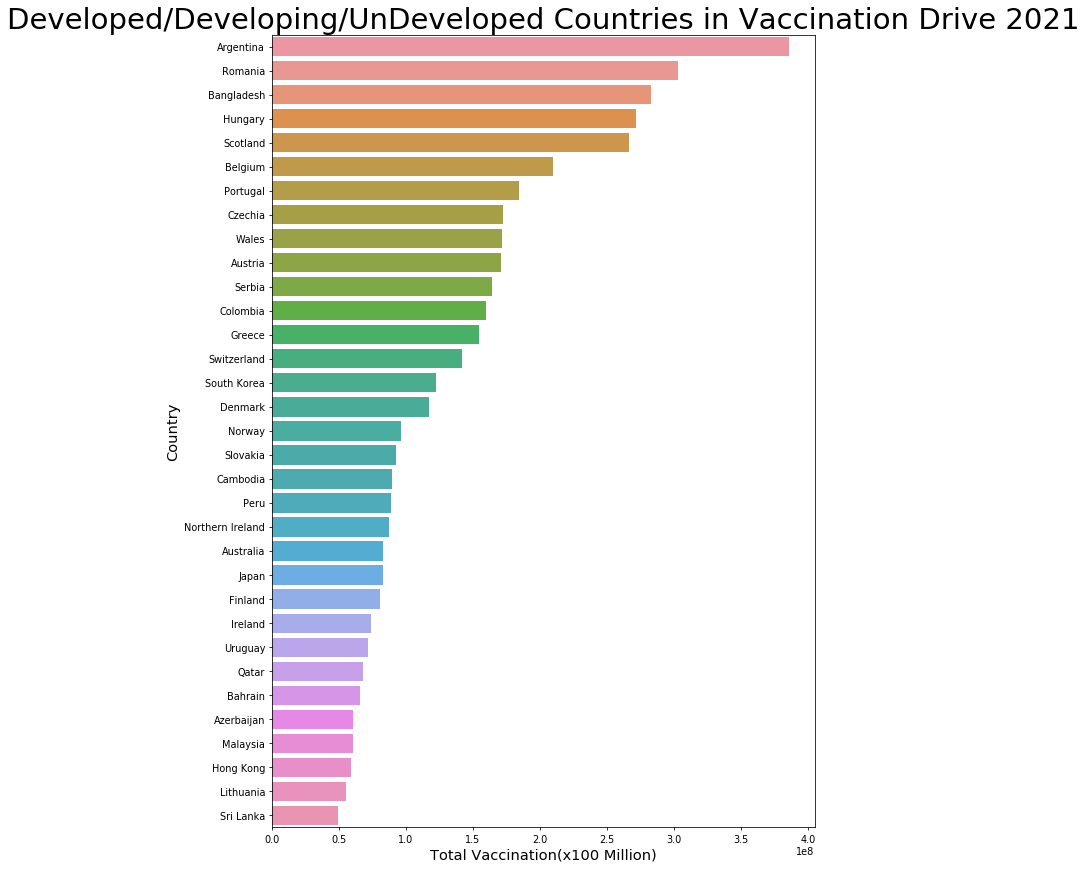

In [28]:
plt.figure(figsize=(10,15), dpi= 70)
plot = sns.barplot(cntry_vs_ttl_vcc_2.total_vaccinations,cntry_vs_ttl_vcc_2.index)

plot.axes.set_title("Developed/Developing/UnDeveloped Countries in Vaccination Drive 2021",fontsize=30)
plot.set_xlabel('Total Vaccination(x100 Million)',fontsize=15)
plot.set_ylabel('Country',fontsize=15)

In [29]:
cntry_vs_ppl_vcc.head()

,people_vaccinated,people_fully_vaccinated,daily_vaccinations
country,,,
Afghanistan,871078.0,55624.0,29150.0
Albania,459256.0,190237.0,524622.0
Algeria,0.0,0.0,3778.0
Andorra,128692.0,26948.0,5598.0
Angola,2138134.0,40195.0,81004.0


In [30]:
first_dose_data = cntry_vs_ppl_vcc[['people_vaccinated']]
first_dose_data .head(21)

,people_vaccinated
country,
Afghanistan,871078.0
Albania,459256.0
Algeria,0.0
Andorra,128692.0
Angola,2138134.0
Anguilla,35030.0
Antigua and Barbuda,306879.0
Argentina,324438369.0
Armenia,11292.0


In [31]:
first_dose_data = pd.DataFrame(first_dose_data.people_vaccinated.sort_values(ascending = False),columns=['people_vaccinated'])
first_dose_data.head()

,people_vaccinated
country,
United States,9.315763e+09
India,5.554347e+09
United Kingdom,2.747325e+09
England,2.321574e+09
Brazil,1.352683e+09


In [32]:
bth_doses = cntry_vs_ppl_vcc[['people_fully_vaccinated']]

In [33]:
bth_doses = pd.DataFrame(bth_doses.people_fully_vaccinated.sort_values(ascending = False),columns=['people_fully_vaccinated'])
bth_doses.head()

,people_fully_vaccinated
country,
United States,5.467496e+09
India,1.060438e+09
United Kingdom,5.767160e+08
Turkey,5.004870e+08
Brazil,4.795795e+08


Text(0, 0.5, 'Country')

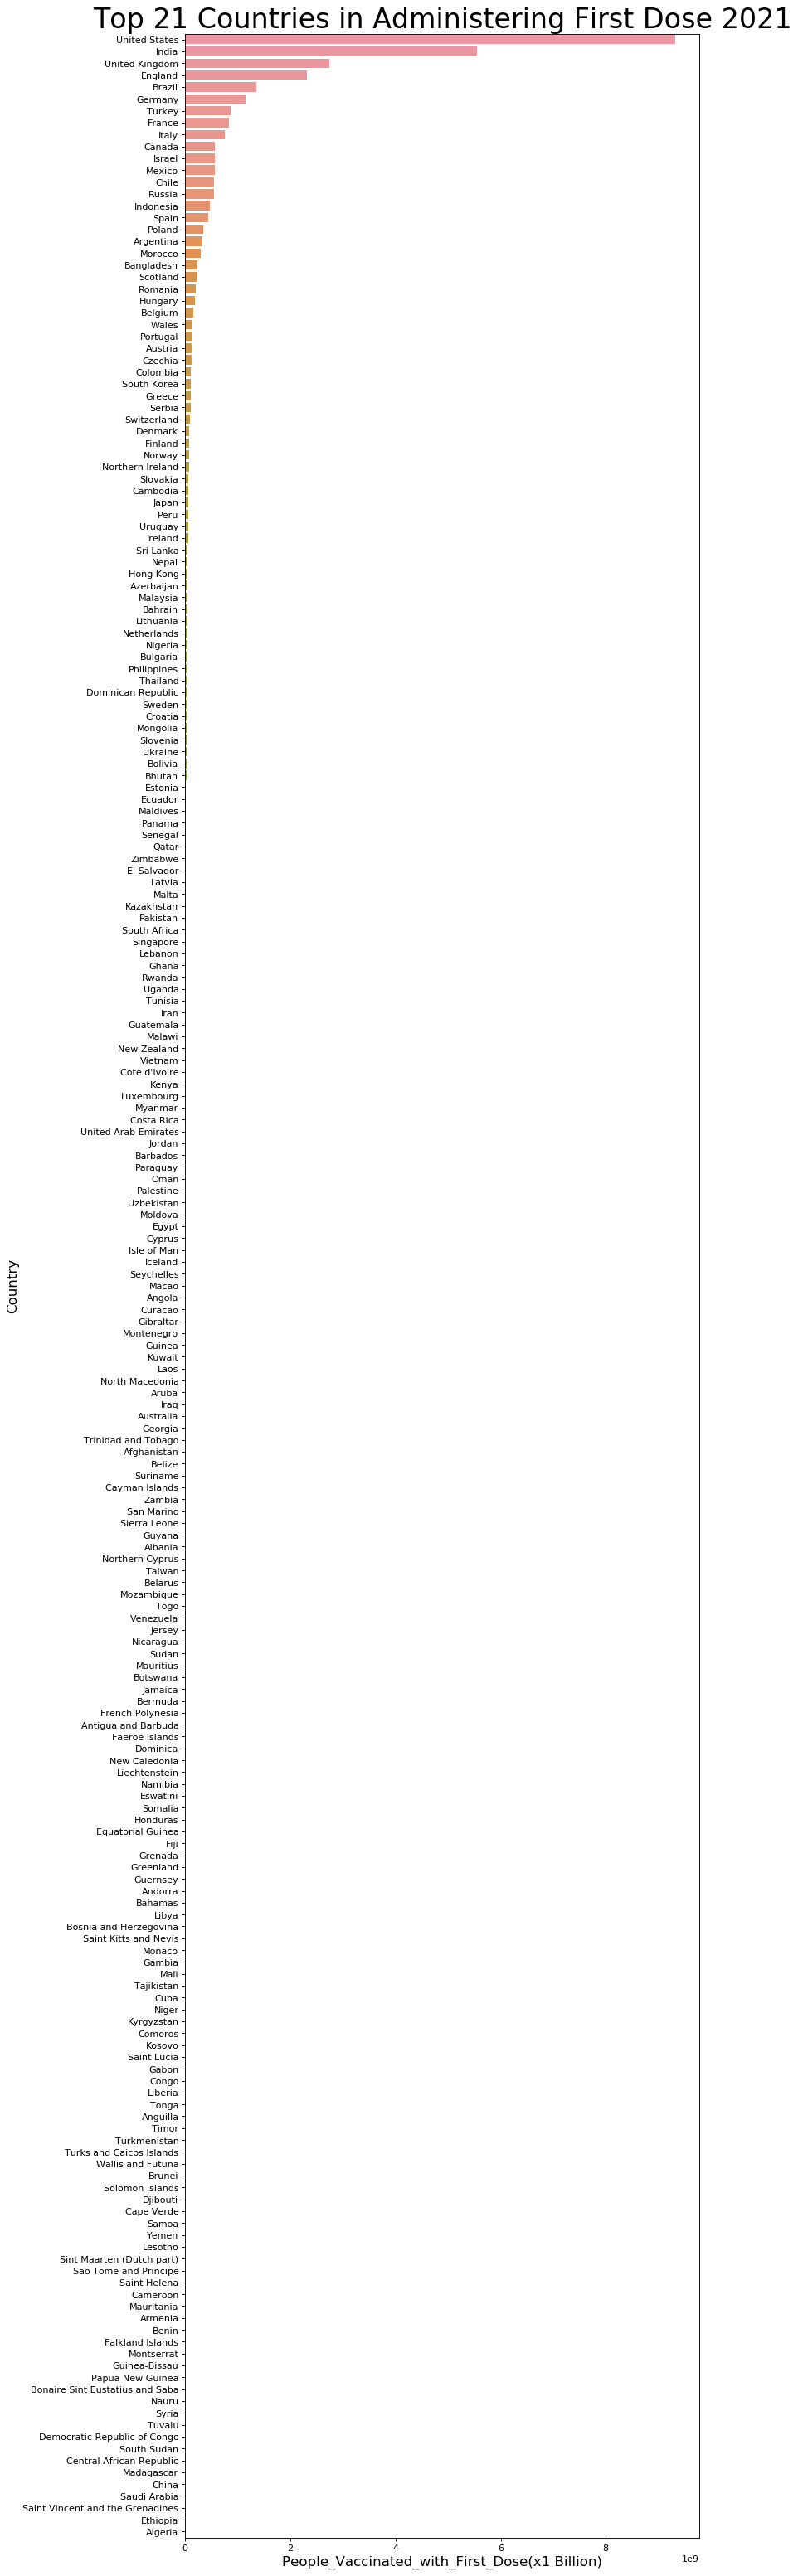

In [34]:
plt.figure(figsize=(10,50), dpi= 80)
plot = sns.barplot(first_dose_data.people_vaccinated,first_dose_data.index)

plot.axes.set_title("Top 21 Countries in Administering First Dose 2021",fontsize=30)
plot.set_xlabel('People_Vaccinated_with_First_Dose(x1 Billion)',fontsize=15)
plot.set_ylabel('Country',fontsize=15)

In [35]:
first_dose_data_1 = first_dose_data[first_dose_data.people_vaccinated >= 219750908.0]
first_dose_data_2 = first_dose_data[first_dose_data.people_vaccinated < 219750908.0]

first_dose_data_1.shape

(21, 1)

Text(0, 0.5, 'Country')

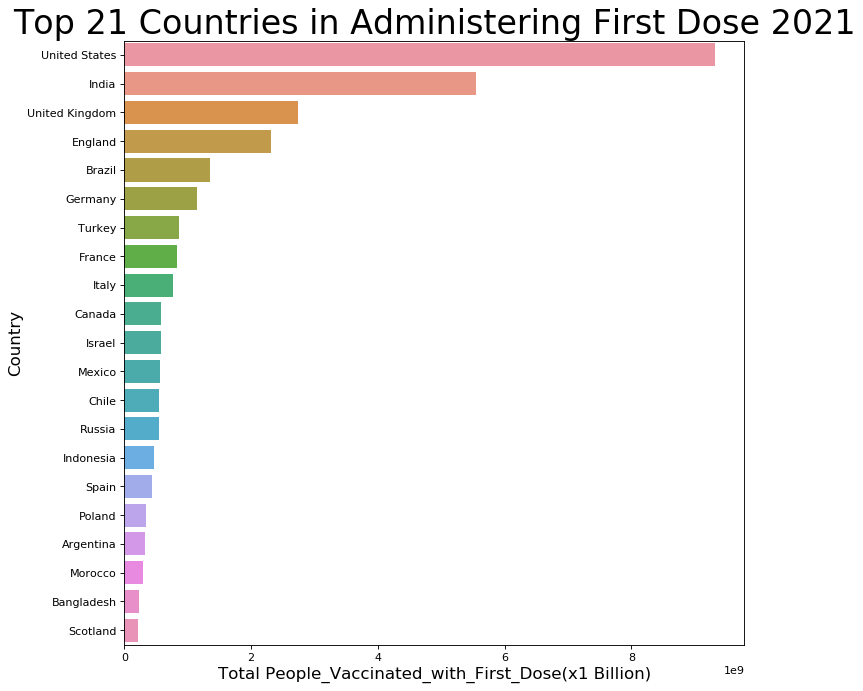

In [36]:
plt.figure(figsize=(10,10), dpi= 80)
plot = sns.barplot(first_dose_data_1.people_vaccinated,first_dose_data_1.index)

plot.axes.set_title("Top 21 Countries in Administering First Dose 2021",fontsize=30)
plot.set_xlabel('Total People_Vaccinated_with_First_Dose(x1 Billion)',fontsize=15)
plot.set_ylabel('Country',fontsize=15)

Text(0, 0.5, 'Country')

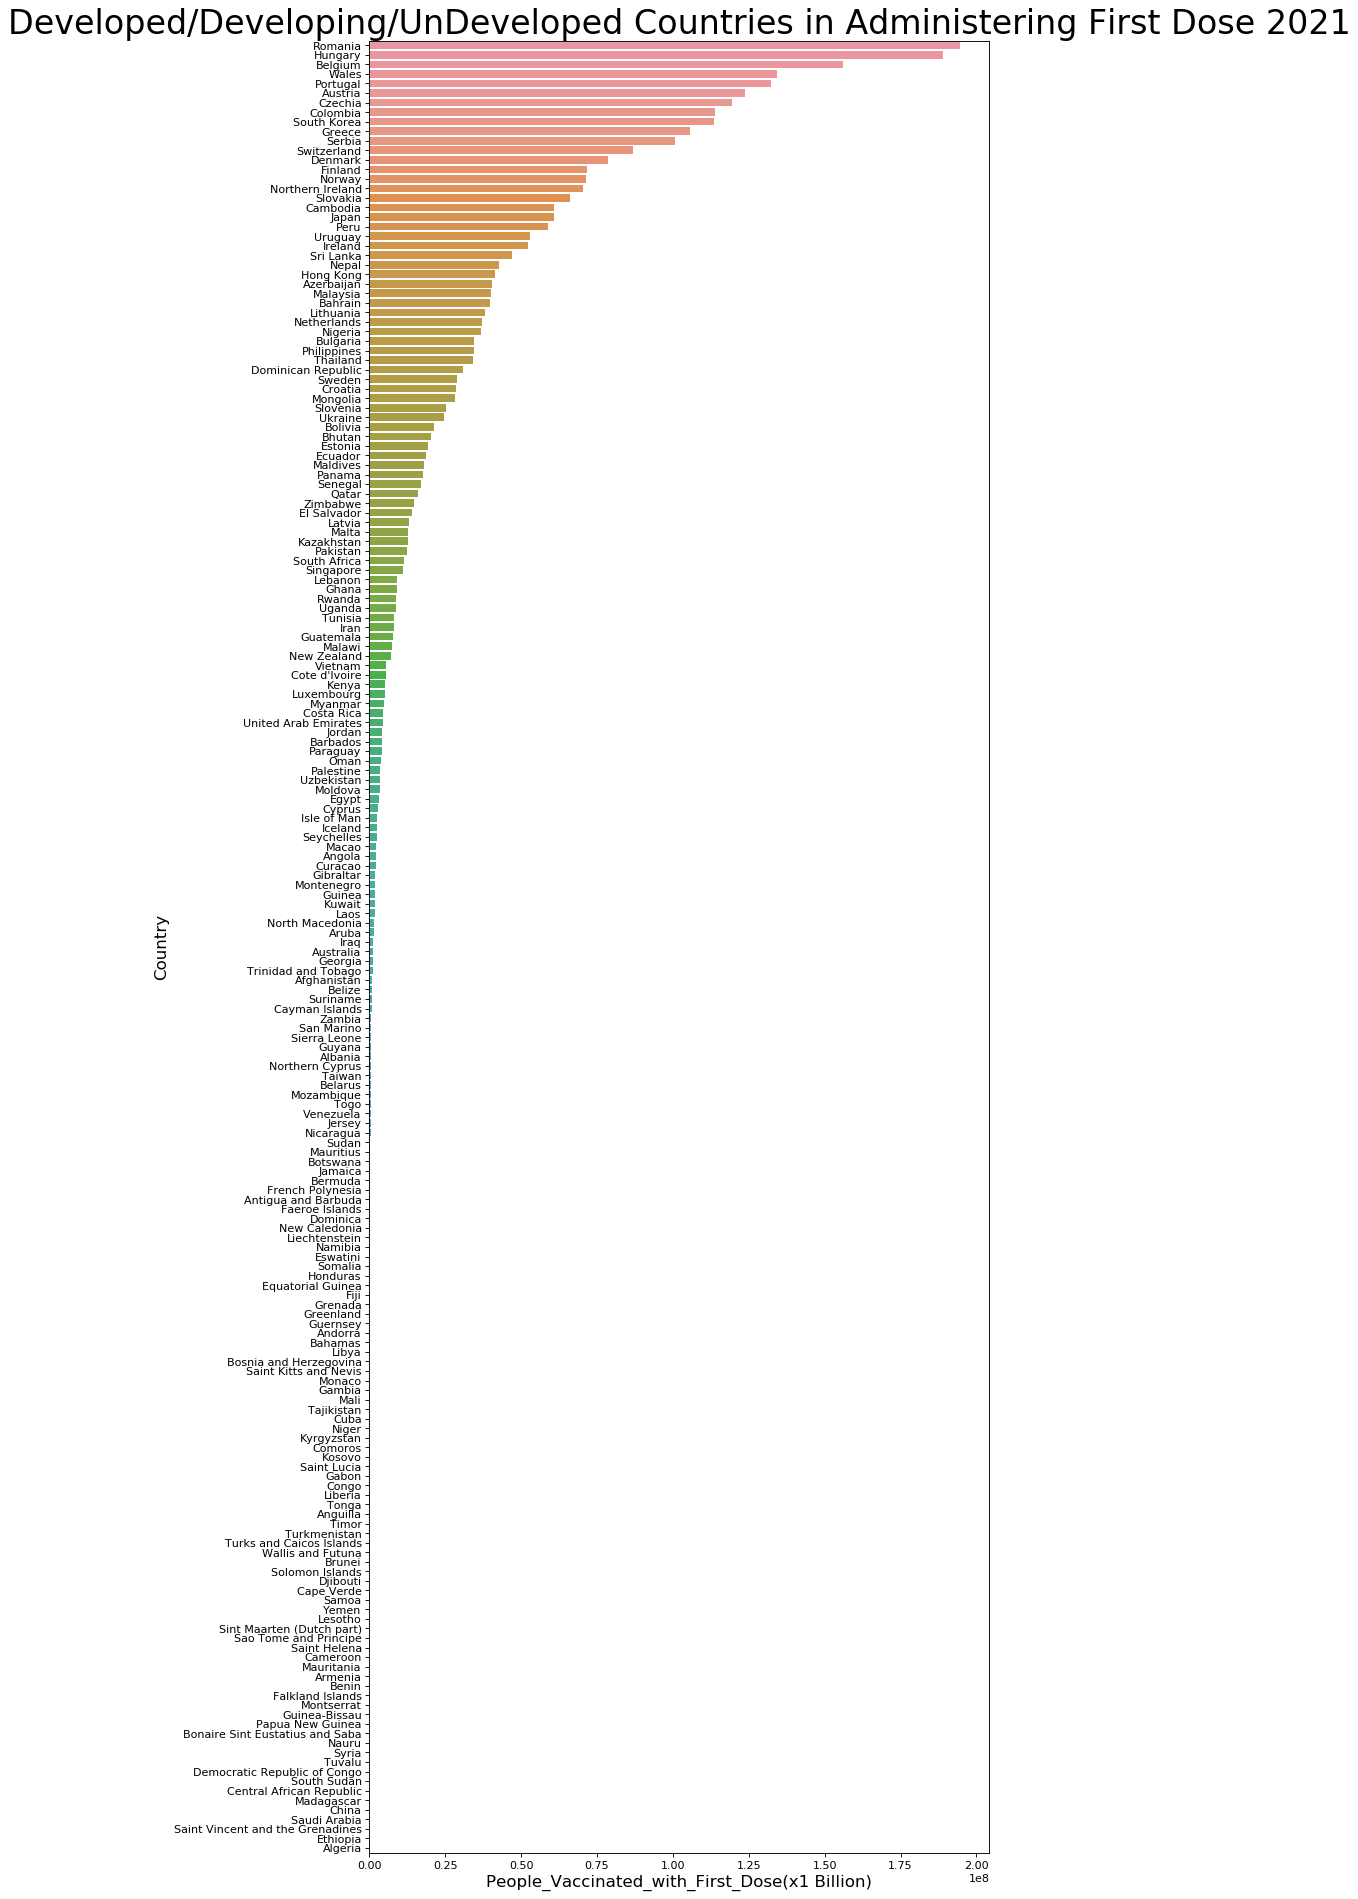

In [37]:
plt.figure(figsize=(10,30), dpi= 80)
plot = sns.barplot(first_dose_data_2.people_vaccinated,first_dose_data_2.index)

plot.axes.set_title("Developed/Developing/UnDeveloped Countries in Administering First Dose 2021",fontsize=30)
plot.set_xlabel('People_Vaccinated_with_First_Dose(x1 Billion)',fontsize=15)
plot.set_ylabel('Country',fontsize=15)

In [38]:
first_dose_data_2_a = first_dose_data_2[first_dose_data_2.people_vaccinated >= 3024165.0]
first_dose_data_2_b = first_dose_data_2[first_dose_data_2.people_vaccinated < 3024165.0]

Text(0, 0.5, 'Country')

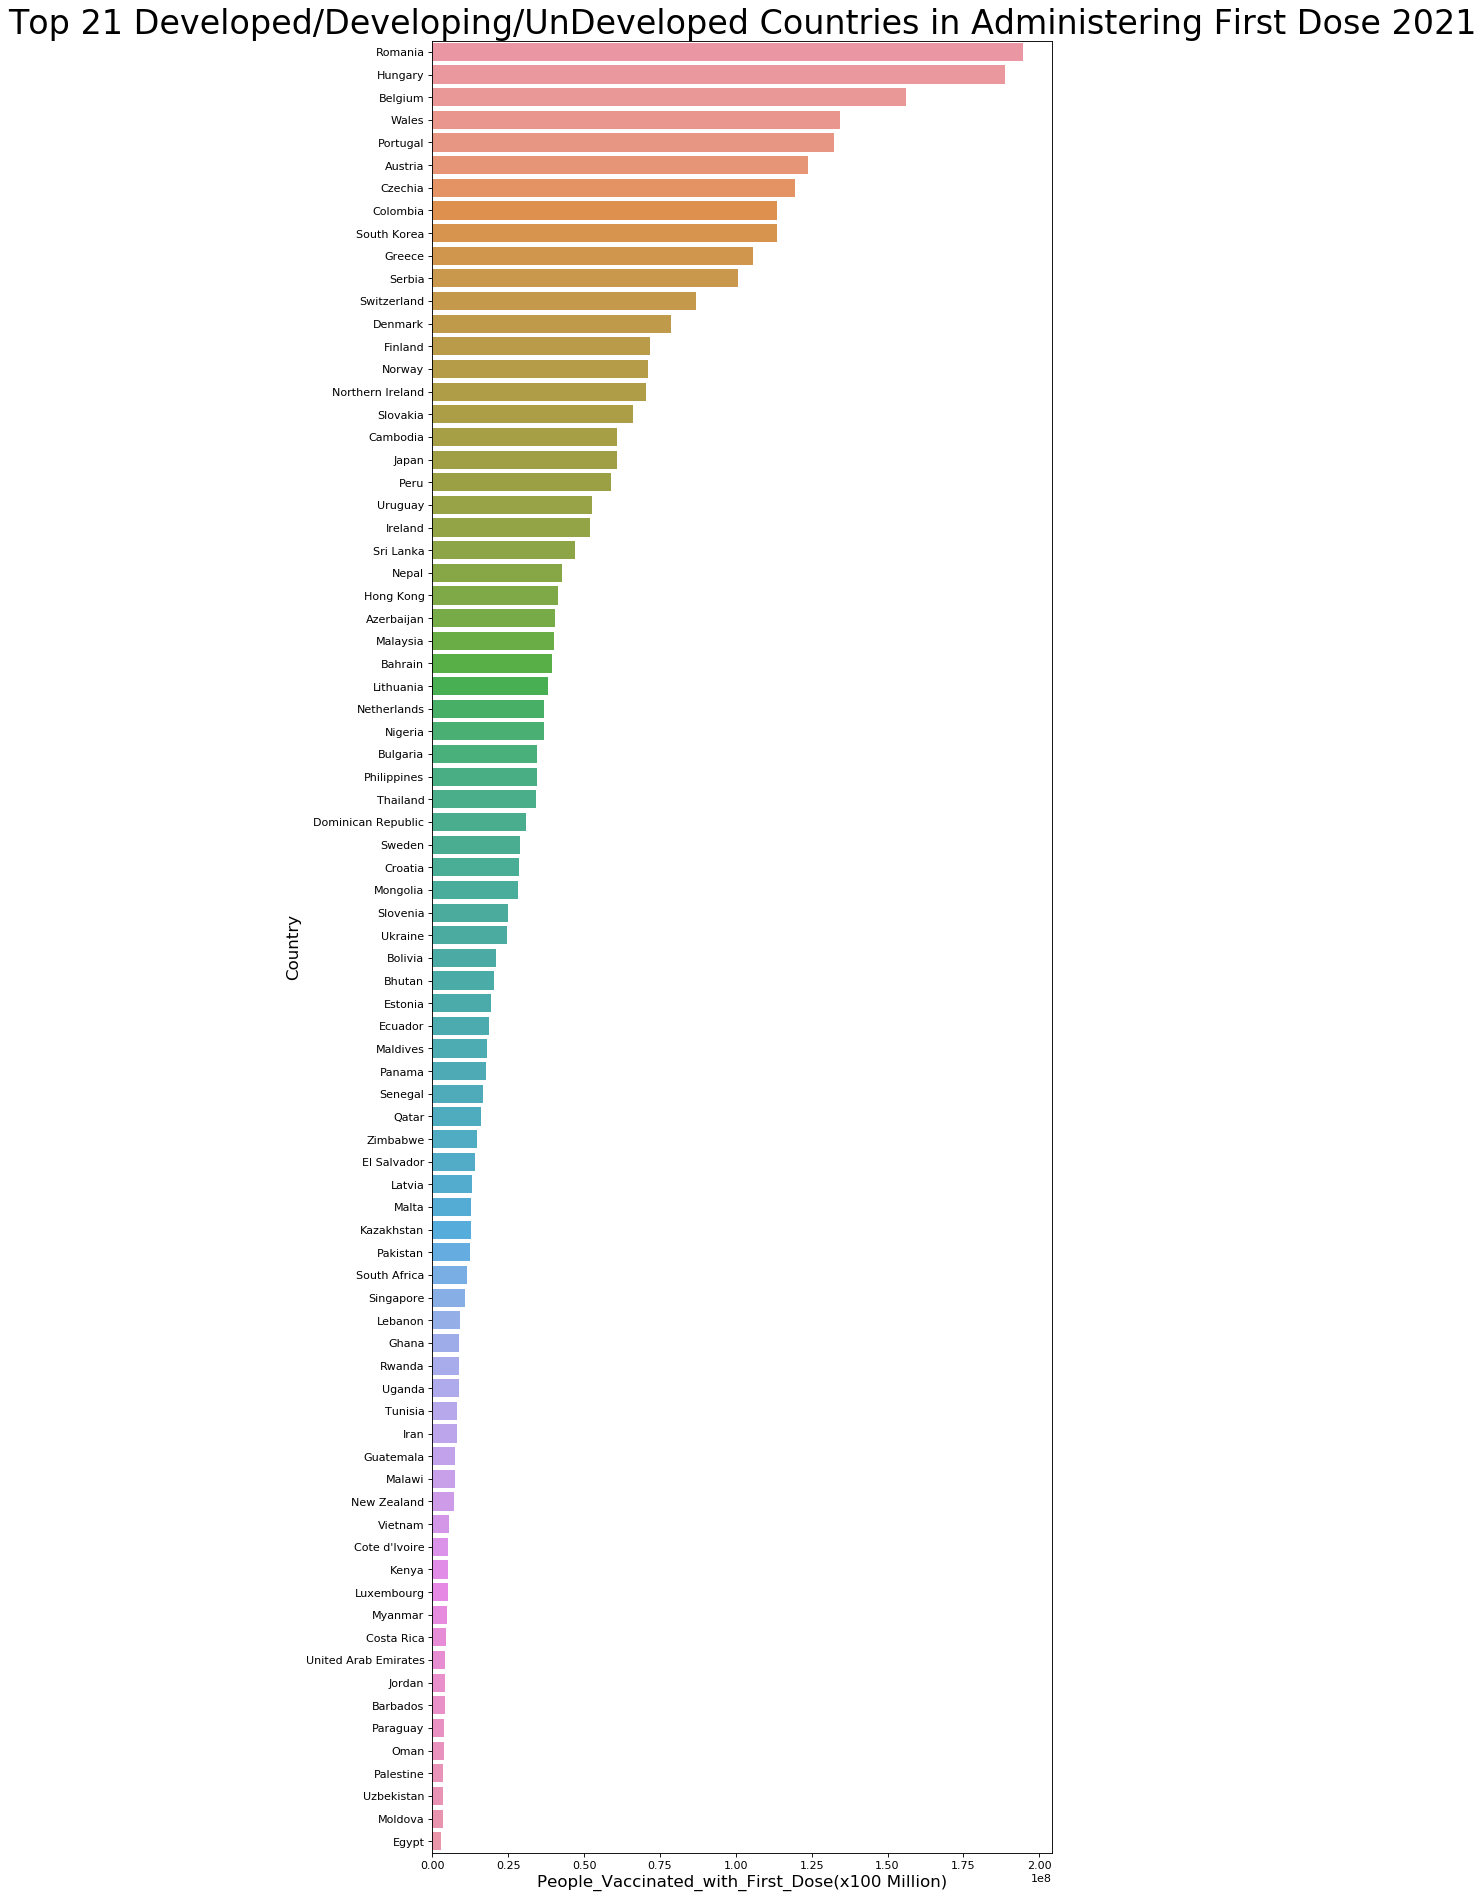

In [39]:
plt.figure(figsize=(10,30), dpi= 80)
plot = sns.barplot(first_dose_data_2_a.people_vaccinated,first_dose_data_2_a.index)

plot.axes.set_title("Top 21 Developed/Developing/UnDeveloped Countries in Administering First Dose 2021",fontsize=30)
plot.set_xlabel('People_Vaccinated_with_First_Dose(x100 Million)',fontsize=15)
plot.set_ylabel('Country',fontsize=15)

Text(0, 0.5, 'Country')

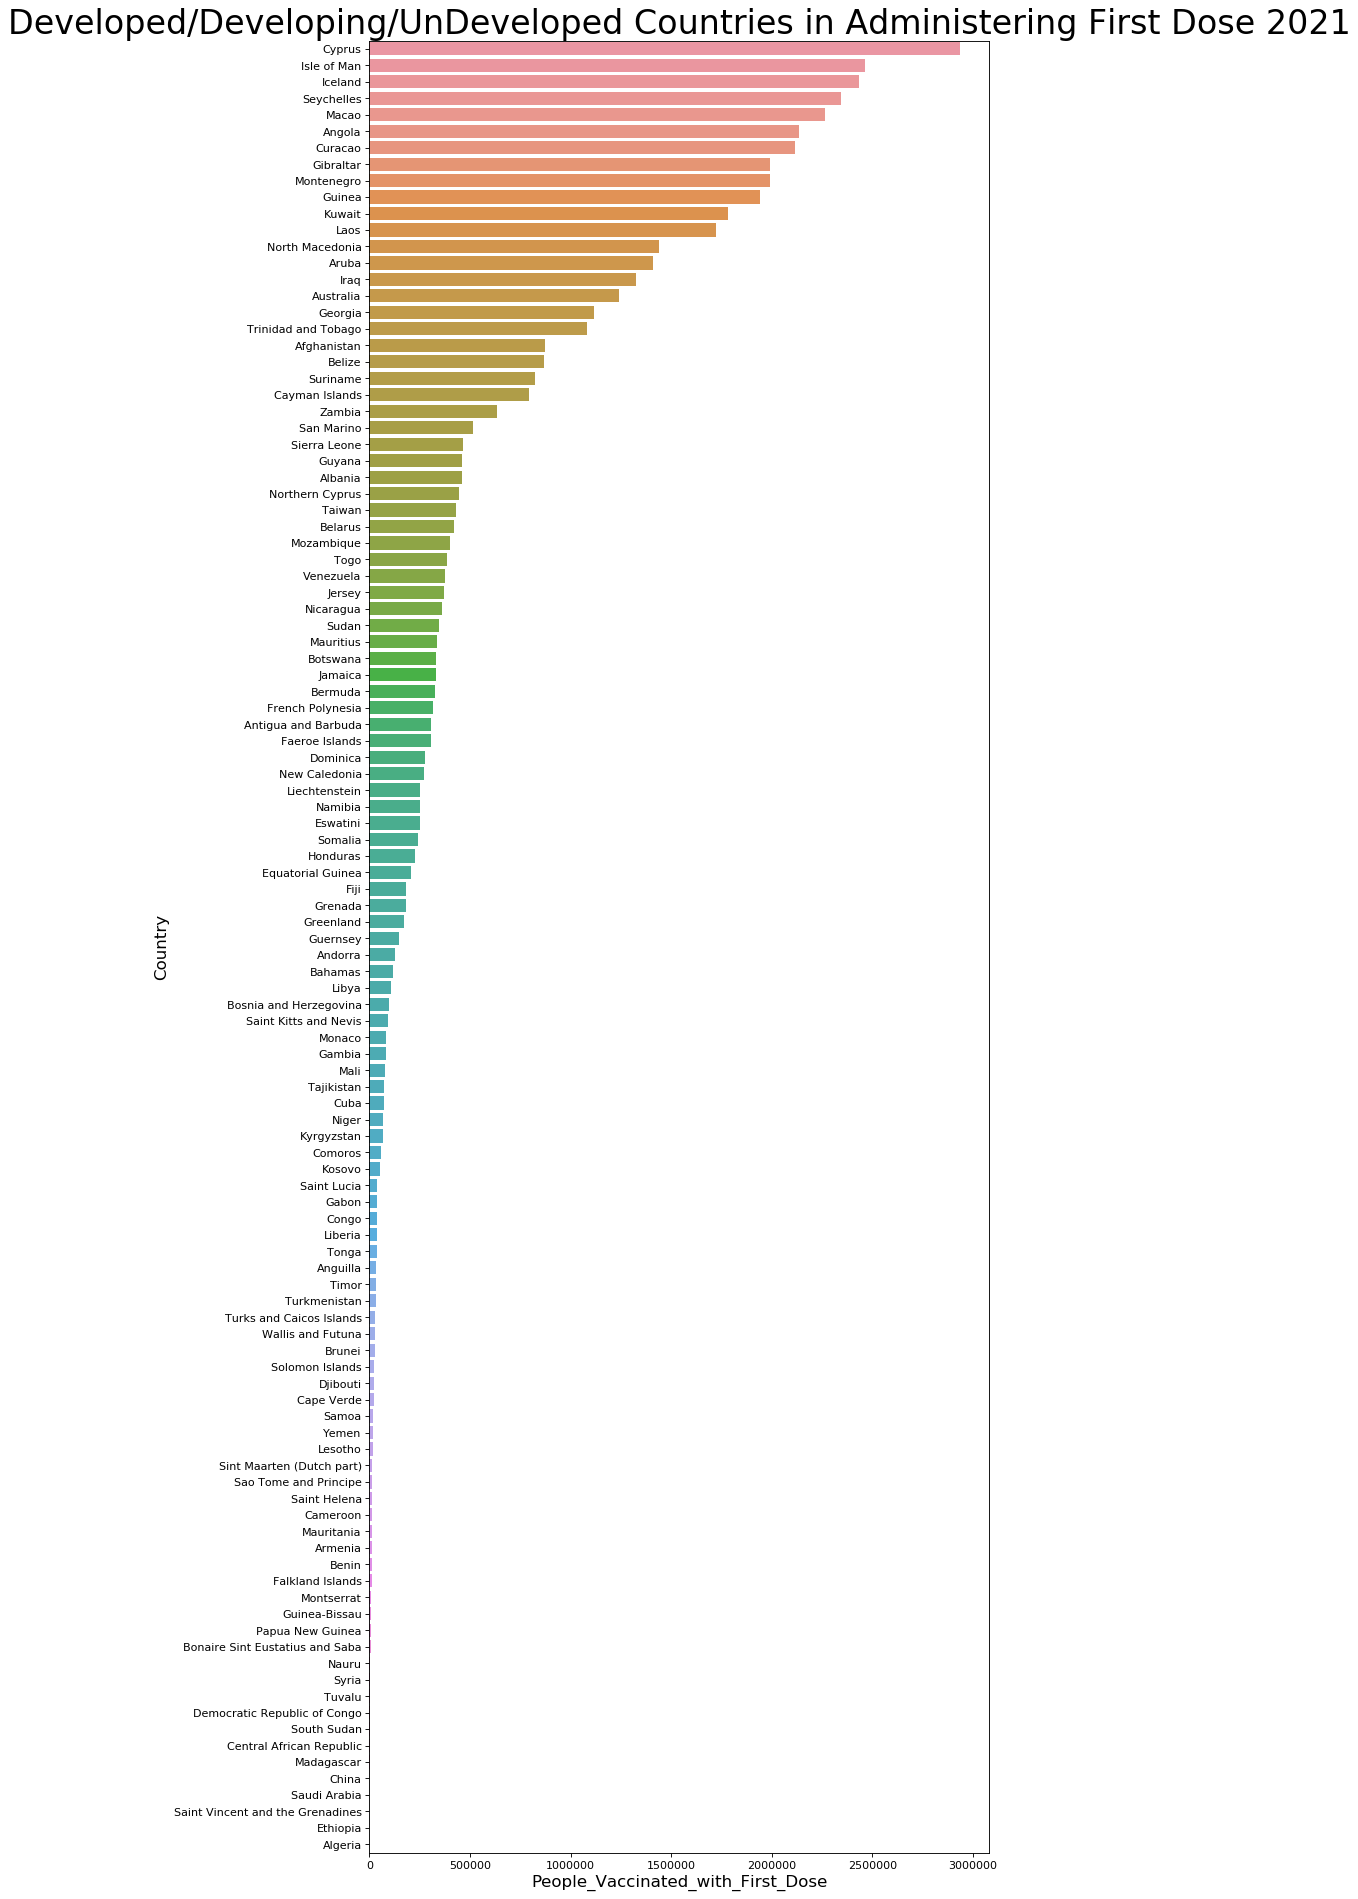

In [40]:
plt.figure(figsize=(10,30), dpi= 80)
plot = sns.barplot(first_dose_data_2_b.people_vaccinated,first_dose_data_2_b.index)

plot.axes.set_title("Developed/Developing/UnDeveloped Countries in Administering First Dose 2021",fontsize=30)
plot.set_xlabel('People_Vaccinated_with_First_Dose',fontsize=15)
plot.set_ylabel('Country',fontsize=15)